## Testing and Debugging the BPASS isochrone at 10^7.0 years age. (Non Solar Metallicity)
In this BPASS isochrone and cluster plot, I go over the BPASS isochrone for 10^7.0 years age, a tenth of solar metallicity, AKs=0.0, and distance of 1000 parsecs from Earth. From the isochrone and cluster, we discuss several plots such as the log_g frequency distribution of the isochrone, the color magnitude diagram (B-V vs M_V), and the current-mass luminosity relationship of the cluster.

**I will be using the Kennicutt IMF(Kennicutt 1983) and a slightly different age. I also use the MISTv.1 model as there are no non-solar-metallicity models for the other stellar evolution models.**

In [1]:
import spisea
from spisea import evolution, synthetic
import math
# Check if the evolution class works fine
import time
import numpy as np
t1=time.time()
bps=evolution.BPASS()
iso1=synthetic.Isochrone_Binary(7.0, 0.0, 1000,math.log10(0.1), mass_sampling=1)

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/locations.py:345: UserWarning: Extinction files not found in /g/lu/models/cdbs/extinction
  warnings.warn('Extinction files not found in %s' % (extdir, ))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/pysynphot/refs.py:125: UserWarning: No thermal tables found, no thermal calculations can be performed. No files found for /g/lu/models/cdbs/mtab/*_tmt.fits
  'no thermal calculations can be performed. ' + str(e))
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: invalid value encountered in true_divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/u/ryotainagaki/Desktop/PyPopStar/spisea/evolution.py:1792: RuntimeWarning: overflow encountered in power
  (1 / cs.au) * un.m)
/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/astropy/units/quantity.py:479: RuntimeWarning: divide by zero encountered in true_divide
  result 

Changing to T= 50000 for T=181176 logg=5.89
Changing to logg=5.00 for T=181176 logg=5.89
Changing to T= 50000 for T= 51512 logg=4.31
Changing to logg=5.00 for T= 51512 logg=4.31
Changing to logg=5.00 for T= 49421 logg=4.31
Changing to T= 50000 for T= 53429 logg=4.31
Changing to logg=5.00 for T= 53429 logg=4.31
Changing to T= 50000 for T= 58383 logg=4.33
Changing to logg=5.00 for T= 58383 logg=4.33
Changing to T= 50000 for T= 56650 logg=4.32
Changing to logg=5.00 for T= 56650 logg=4.32
Changing to logg=4.50 for T= 47267 logg=4.32
Changing to logg=2.50 for T= 11956 logg=1.83
Changing to T= 50000 for T= 62596 logg=4.42
Changing to logg=5.00 for T= 62596 logg=4.42
Changing to T= 50000 for T= 62596 logg=4.42
Changing to logg=5.00 for T= 62596 logg=4.42
Changing to logg=2.50 for T= 11953 logg=1.83
Changing to logg=2.50 for T= 12020 logg=1.51
Changing to logg=4.00 for T= 31778 logg=3.86
Changing to logg=4.00 for T= 38122 logg=3.28
Changing to logg=3.00 for T= 23610 logg=2.66
Changing to logg=

Checking if all phases represented in the isochrone are valid phases.

In [2]:
import numpy as np
np.all([(x == 5 or x == 101 or x==102 or x==103) for x in iso1.primaries['phase']])

True

In [3]:
np.all([(x == 5 or x == 101 or x==102 or x==103) for x in iso1.singles['phase']])

True

In [4]:
np.all([(x == 5 or x == 101 or x == -99 or x==102 or x==103) for x in iso1.secondaries['phase']])

True

Find the maximum, mean, and median  values of logg (cgs) for primaries, single stars, and secondaries. 

In [5]:
import numpy as np
np.max(iso1.singles['logg'])

5.893166216900485

In [6]:
import numpy as np
np.max(np.nan_to_num(iso1.primaries['logg'], -np.inf))

6.014527259205064

In [7]:
np.max(np.nan_to_num(iso1.secondaries['logg']))

5.477660824834683

In [8]:
np.mean(iso1.singles['logg'][np.where(~np.isnan(iso1.singles['logg']))])

4.346046095913214

In [9]:
np.mean(iso1.primaries['logg'][np.where(~np.isnan(iso1.primaries['logg']))])

3.8669286871048065

In [10]:
np.mean(iso1.secondaries['logg'][np.where(~np.isnan(iso1.secondaries['logg']))])

4.061781883661361

In [11]:
np.median(iso1.singles['logg'][np.where(~np.isnan(iso1.singles['logg']))])

4.369644990441944

In [12]:
np.median(iso1.primaries['logg'][np.where(~np.isnan(iso1.primaries['logg']))])

4.087974438060869

In [13]:
np.median([x for x in iso1.secondaries['logg'] if np.isfinite(x)])

4.310810637133002

Text(0.5, 0, 'logg in cgs')

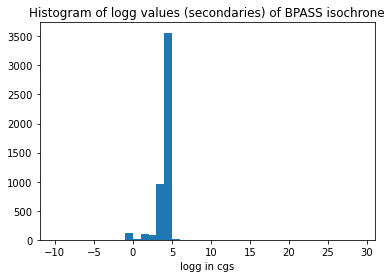

In [14]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values (secondaries) of BPASS isochrone")
plt.hist(np.array([x for x in iso1.secondaries['logg'] if np.isfinite(x)]), np.arange(-10, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

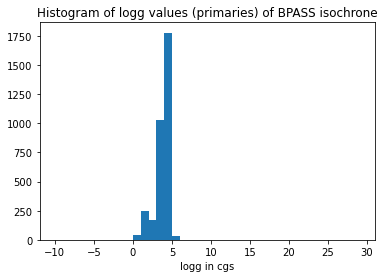

In [15]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values (primaries) of BPASS isochrone")
plt.hist(np.array([x for x in iso1.primaries['logg'] if np.isfinite(x)]), np.arange(-10, 30, 1))
plt.xlabel("logg in cgs")

Text(0.5, 0, 'logg in cgs')

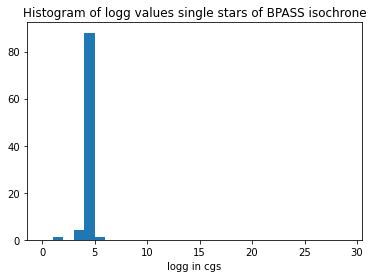

In [16]:
import matplotlib.pyplot as plt
plt.title("Histogram of logg values single stars of BPASS isochrone")
plt.hist(np.array([x for x in iso1.singles['logg'] if np.isfinite(x)]), np.arange(0, 30, 1))
plt.xlabel("logg in cgs")

What exactly could be causing the vertical line? First, I want to zoom in...
Plotting the CMD for the Color magnitude diagram for high surface gravity stars. Remember to account for distance modulus for dist = 1000 pc

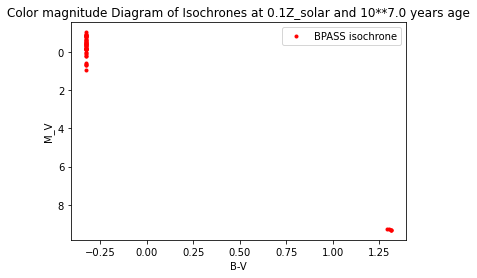

In [17]:
import matplotlib.pyplot as plt
indices1= np.where(iso1.singles['logg'] > 5)[0]
indices2= np.where(iso1.primaries['logg'] > 5)[0]
indices3= np.where(iso1.secondaries['logg'] > 5)[0]
plt.plot(iso1.primaries['m_ubv_B'][indices2] - iso1.primaries["m_ubv_V"][indices2],
         iso1.primaries["m_ubv_V"][indices2] - 5 * np.log10(1000 / 10), "r.")
plt.plot(iso1.secondaries['m_ubv_B'][indices3] - iso1.secondaries["m_ubv_V"][indices3],
         iso1.secondaries["m_ubv_V"][indices3] - 5 * np.log10(1000 / 10), "r.")
plt.plot(iso1.singles['m_ubv_B'][indices1] - iso1.singles["m_ubv_V"][indices1],
         iso1.singles["m_ubv_V"][indices1] - 5 * np.log10(1000 / 10), "r.",
         label="BPASS isochrone")
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at 0.1Z_solar and 10**7.0 years age")
plt.gca().invert_yaxis()
plt.legend()

In [18]:
indices2= np.where((iso1.primaries['logg'] > 5) & (iso1.primaries['m_ubv_B'] -
                                                   iso1.primaries['m_ubv_V'] > -0.4) &
                   (iso1.primaries['m_ubv_B'] - iso1.primaries['m_ubv_V'] < -0.2))[0]

In [19]:
np.unique(iso1.primaries[indices2]['phase'])

5.0


In [20]:
indices2= np.where((iso1.primaries['m_ubv_B'] - iso1.primaries['m_ubv_V'] > 1.2) &
                   (iso1.primaries['m_ubv_B'] - iso1.primaries['m_ubv_V'] < 1.5))[0]

In [21]:
indices2

array([2150, 2389, 2561, 3693, 3963])

In [22]:
np.unique(iso1.primaries['phase'][indices2])

5.0


In [23]:
iso1.primaries[indices2]

mass,L,Teff,R,logg,isWR,mass_current,phase,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,W,K,m,,,solMass,,,,,,,
float64,float64,float64,float64,float64,bool,float64,float64,int64,float64,float64,float64,float64,float64
0.4,1.2620655992139642e+25,4022.4439387259845,260105876.5122988,5.119227217859879,False,0.6731,5.0,1,21.4509080913488,19.309600741830604,20.621503005463673,18.57506422961825,17.64547085076375
0.4,1.3187483495325182e+25,4054.711884519506,261667728.4094566,5.162280956389513,False,0.7522,5.0,1,21.341178017558903,19.23687993397867,20.52995355111152,18.51171600619473,17.596290777432472
0.4,1.2620655992139642e+25,4022.4439387259845,260105876.5122988,5.119227217859879,False,0.6731,5.0,1,21.4509080913488,19.309600741830604,20.621503005463673,18.57506422961825,17.64547085076375
0.4,1.2620655992139642e+25,4022.4439387259845,260105876.5122988,5.119227217859879,False,0.6731,5.0,1,21.4509080913488,19.309600741830604,20.621503005463673,18.57506422961825,17.64547085076375
0.4,1.2869803887833635e+25,4038.778168243262,260540453.1844624,5.1424924959836815,False,0.7125,5.0,1,21.39741319856195,19.275360837483586,20.577476837145163,18.545675853970263,17.62335684775594


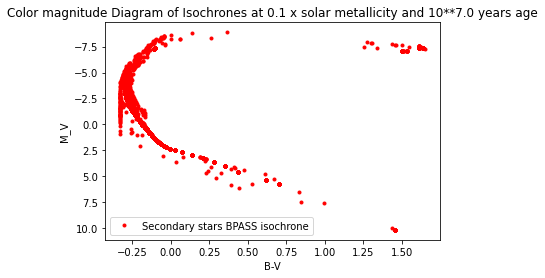

In [24]:
import matplotlib.pyplot as plt
plt.plot(iso1.secondaries['m_ubv_B'] - iso1.secondaries["m_ubv_V"],
         iso1.secondaries["m_ubv_V"] - 5 * np.log10(100), "r.",
         label="Secondary stars BPASS isochrone")
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at 0.1 x solar metallicity and 10**7.0 years age")
plt.gca().invert_yaxis()
plt.legend()

Hmm, I think those are stars that are going to be white dwarves very soon or may unintentionally be brown dwarves. At least according to HOKI's criterion for what is a white dwarf or not. At the very least, at least the stars we just saw were low mass stars so they should be **LOW** on the CMD

In [25]:
iso2=synthetic.IsochronePhot(7.0, 0.0, 1000, math.log10(1 / 10), recomp=False) # New Parsec isochrone for same metallicity

Looking at the distribution of logg values. for the stars in the Parsec isochrone.

In [26]:
np.max(iso2.points['logg'])

4.583447298562488

(array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  72.,
         42.,  93., 208., 247.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
         16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
         29]),
 <BarContainer object of 39 artists>)

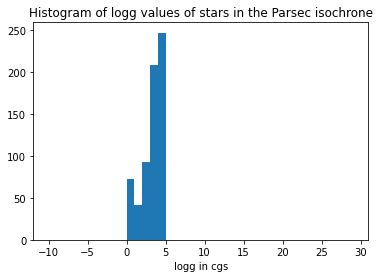

In [27]:
import matplotlib.pyplot as plt
plt.xlabel("logg in cgs")
plt.title("Histogram of logg values of stars in the Parsec isochrone")
plt.hist(np.array([x for x in iso2.points['logg'] if np.isfinite(x)]), np.arange(-10, 30, 1))

In [28]:
np.median(iso2.points['logg'])

3.556386609995295

In [29]:
np.mean(iso2.points['logg'])

3.2602644297347076

In [30]:
from spisea import imf
from spisea.imf import imf, multiplicity
from spisea import ifmr


Make the clusters corresponding to the binary star isochrone and the Parsec isochrone

In [31]:
clus_1=synthetic.Cluster_w_Binaries(iso1, imf.IMFSalpeter1955(multiplicity=multiplicity.MultiplicityResolvedDK()),
                                20000, ifmr=ifmr.IFMR_Spera15())
clus_2=synthetic.ResolvedCluster(iso2, imf.IMFSalpeter1955(multiplicity=multiplicity.MultiplicityResolvedDK()),
                                 20000, ifmr=ifmr.IFMR_Spera15())

6818 single stars had to be deleted
3397.7263309012087 solar masses had to be deleted from single stars before application of the IFMR


/u/ryotainagaki/Desktop/PyPopStar/spisea/synthetic.py:728: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  compMass = np.array([compMass[x] for x in indices])


Running the changing phase on companions
1 non-single star systems had to be deleted before IFMR application
1131 companions had to be deleted before IFMR was applied


Now let's visualize the isochrone we have created so far with a color magnitude diagram. There we can see the end of main sequence and perhaps the M type

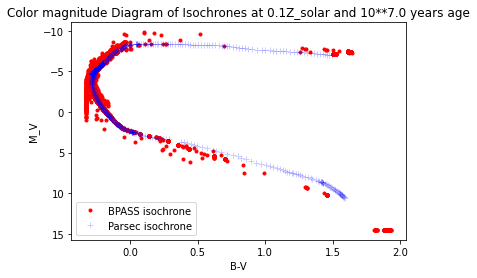

In [32]:
# Taking a look at the BPASS Cluster vs Parsec cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(iso1.primaries['m_ubv_B'] - iso1.primaries["m_ubv_V"],
         iso1.primaries["m_ubv_V"] - 5 * np.log10(100), "r.")
plt.plot(iso1.secondaries['m_ubv_B']-iso1.secondaries["m_ubv_V"],
         iso1.secondaries["m_ubv_V"] - 5 * np.log10(100), "r.")
plt.plot(iso1.singles['m_ubv_B'] - iso1.singles["m_ubv_V"],
         iso1.singles["m_ubv_V"] - 5 * np.log10(100), "r.", label="BPASS isochrone")
plt.plot(iso2.points['m_ubv_B'] - iso2.points["m_ubv_V"],
         iso2.points["m_ubv_V"] - 5 * np.log10(100), "b+", label="Parsec isochrone", alpha = 0.2)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at 0.1Z_solar and 10**7.0 years age")
plt.gca().invert_yaxis()
plt.legend()

We do have several outliers but otherwise the pattern does not seem too terribly off from the Parsec isochrone's shape. Now I look at the primary stars and see if there are any problems caused.

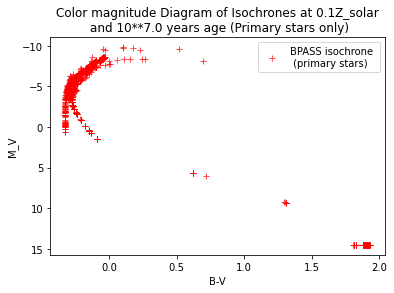

In [33]:
# Taking a look at the BPASS Cluster vs Parsec cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(iso1.primaries['m_ubv_B'] - iso1.primaries["m_ubv_V"],
         iso1.primaries["m_ubv_V"] - 5 * np.log10(100), "r+",  label="BPASS isochrone \n (primary stars)", alpha=0.7)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of Isochrones at 0.1Z_solar\n" +
          " and 10**7.0 years age (Primary stars only)")
plt.gca().invert_yaxis()
plt.legend()

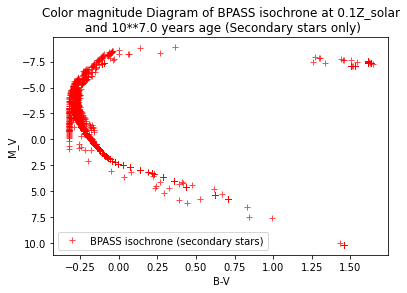

In [34]:
import matplotlib.pyplot as plt
plt.plot(iso1.secondaries['m_ubv_B'] - iso1.secondaries["m_ubv_V"],
         iso1.secondaries["m_ubv_V"] - 5*np.log10(100), "r+",  label="BPASS isochrone (secondary stars)", alpha =0.7)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of BPASS isochrone at 0.1Z_solar\n" +
          " and 10**7.0 years age (Secondary stars only)")
plt.gca().invert_yaxis()
plt.legend()

Let's compare this to a BPASS Cluster(Salpeter IMF, 10^7.0 yr old, 1/10th of solar metallicity)

Where are some of the goofy outliers coming from?

In [36]:
iso1.secondaries[np.where(iso1.secondaries["m_ubv_V"] - 5*np.log10(100) > 20.0)[0]]

mass,log_a,L,Teff,R,logg,isWR,mass_current,phase,merged,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,,W,K,m,,,solMass,,,,,,,,
float64,float64,float64,float64,float64,float64,bool,float64,float64,bool,int64,float64,float64,float64,float64,float64


In [37]:
issue = iso1.secondaries[np.where(iso1.secondaries["m_ubv_V"] - 5*np.log10(100) > 20.0)[0]]

In [38]:
np.unique(issue['mass'])

<Column name='mass' dtype='float64' unit='solMass' length=0>

In [39]:
np.unique(issue['phase'])

<Column name='phase' dtype='float64' length=0>

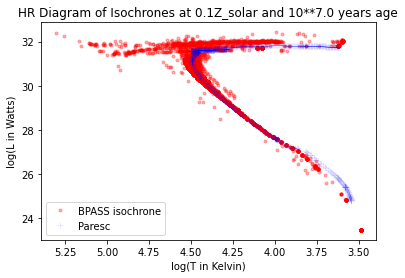

In [40]:
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['Teff']), np.log10(iso1.primaries["L"]), "r.", alpha =0.3)
plt.plot(np.log10(iso1.secondaries['Teff']), np.log10(iso1.secondaries["L"]), "r.", alpha =0.3)
plt.plot(np.log10(iso1.singles['Teff']), np.log10(iso1.singles["L"]), "r.",
         label="BPASS isochrone", alpha =0.3)
plt.plot(np.log10(iso2.points['Teff']), np.log10(iso2.points["L"]), "b+",
         label="Paresc", alpha =0.1)
plt.xlabel("log(T in Kelvin)")
plt.ylabel("log(L in Watts)")
plt.title("HR Diagram of Isochrones at 0.1Z_solar and 10**7.0 years age")
plt.gca().invert_xaxis()
plt.legend()
# Rough pattern seems to fit. What's that line?

A good sign here is that there are plenty of compact remnant (that means noticable number of stars have gone through their main-sequence and post-main sequence). I also notice stars turning to the red giant branch. This is going to be really important when we decide to use the clusters as reference for finding ages of actual star clusters.

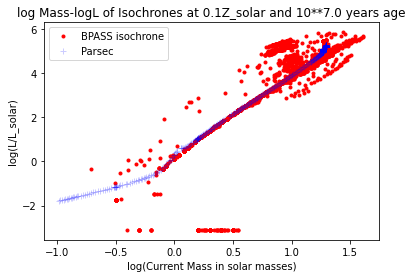

In [41]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['mass_current']), np.log10(iso1.primaries["L"] / cs.L_sun), "r.")
plt.plot(np.log10(iso1.secondaries['mass_current']), np.log10(iso1.secondaries["L"] / cs.L_sun), "r.")
plt.plot(np.log10(iso1.singles['mass_current']), np.log10(iso1.singles["L"] / cs.L_sun),
         "r.", label="BPASS isochrone")
plt.plot(np.log10(iso2.points['mass_current']), np.log10(iso2.points["L"] / cs.L_sun),
         "b+", label="Parsec", alpha =0.2)
plt.xlabel("log(Current Mass in solar masses)")
plt.ylabel("log(L/L_solar)")
plt.title("log Mass-logL of Isochrones at 0.1Z_solar and 10**7.0 years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

Which table is causing that line segment at around log10(L/L_sun)=-3?
Let's find out.
First I take a look at the shape of the primary stars' plot for log current mass log L.

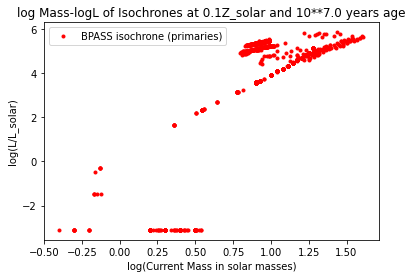

In [42]:
from astropy import constants as cs
import matplotlib.pyplot as plt
plt.plot(np.log10(iso1.primaries['mass_current']),
         np.log10(iso1.primaries["L"] / cs.L_sun),
         "r.", label="BPASS isochrone (primaries)")
plt.xlabel("log(Current Mass in solar masses)")
plt.ylabel("log(L/L_solar)")
plt.title("log Mass-logL of Isochrones at 0.1Z_solar and 10**7.0 years age")
plt.legend()

Which type of secondary star is it that is causing this strange pattern?

In [43]:
bad_line = iso1.primaries[np.where((np.log10(iso1.primaries["L"] / cs.L_sun) > -3.30) &
                                   (np.log10(iso1.primaries["L"] / cs.L_sun) < -3.10))[0]]

In [44]:
bad_line

mass,L,Teff,R,logg,isWR,mass_current,phase,source,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,W,K,m,,,solMass,,,,,,,
float64,float64,float64,float64,float64,bool,float64,float64,int64,float64,float64,float64,float64,float64


What sorts of characteristics (logg, Teff, L) can be causing it? Let's find out

In [45]:
np.unique(bad_line['L'])

<Column name='L' dtype='float64' unit='W' length=0>

In [46]:
np.unique(bad_line['Teff'])

<Column name='Teff' dtype='float64' unit='K' length=0>

In [47]:
np.unique(bad_line['logg'])

<Column name='logg' dtype='float64' unit='' length=0>

In [48]:
np.unique(bad_line['mass'])

<Column name='mass' dtype='float64' unit='solMass' length=0>

In [49]:
np.unique(bad_line['phase'])

<Column name='phase' dtype='float64' length=0>

**It turns out that the line was caused by some compact remnants that were lingering around from the NEWSECMODS. In future versions of the stellar evolution model, I may obtain an additional program from the BPASS creators to match the types of compact remnants from the NEWSECMODS.**

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


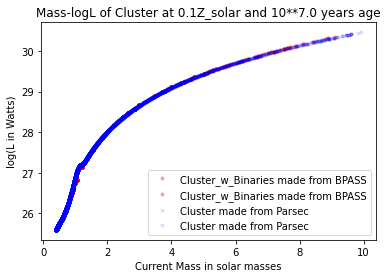

In [50]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
plt.plot((clus_1.star_systems['mass_current']), np.log10(clus_1.star_systems["L"]),
         "r.", label="Cluster_w_Binaries made from BPASS", alpha =0.3)
plt.plot((clus_1.companions['mass_current']), np.log10(clus_1.companions["L"]),
         "r.", label="Cluster_w_Binaries made from BPASS", alpha = 0.3)
plt.plot((clus_2.star_systems['mass_current']), np.log10(clus_2.star_systems["L"]),
         "b.", label="Cluster made from Parsec", alpha =0.1)
plt.plot((clus_2.companions['mass_current']), np.log10(clus_2.companions["L"]),
         "b.", label="Cluster made from Parsec", alpha = 0.1)
plt.xlabel("Current Mass in solar masses")
plt.ylabel("log(L in Watts)")
plt.title("Mass-logL of Cluster at 0.1Z_solar and 10**7.0 years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

OK. It makes sense that our compact remnants are causing this. (Remember, there really is no significant fusion in the insides of neutron stars or white dwarves.

/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


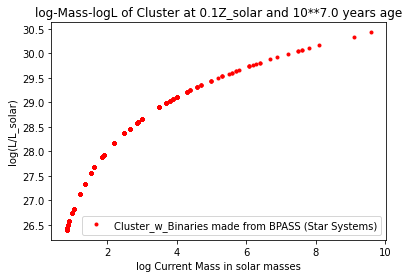

In [51]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
from astropy import units as u
import matplotlib.pyplot as plt
plt.plot(clus_1.star_systems['mass_current'], np.log10(clus_1.star_systems["L"]), "r.",
         label="Cluster_w_Binaries made from BPASS (Star Systems)", alpha =1)
plt.xlabel("log Current Mass in solar masses")
plt.ylabel("log(L/L_solar)")
plt.title("log-Mass-logL of Cluster at 0.1Z_solar and 10**7.0 years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

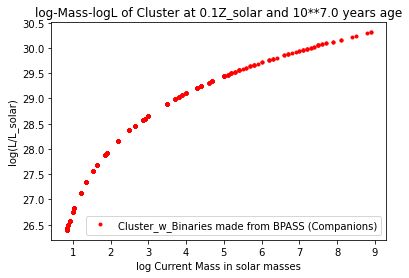

In [52]:
# Plot the mass-luminosity relationship
from astropy import constants as cs
from astropy import units as u
import matplotlib.pyplot as plt
plt.plot(clus_1.companions['mass_current'], np.log10(clus_1.companions["L"]), "r.",
         label="Cluster_w_Binaries made from BPASS (Companions)", alpha =1)
plt.xlabel("log Current Mass in solar masses")
plt.ylabel("log(L/L_solar)")
plt.title("log-Mass-logL of Cluster at 0.1Z_solar and 10**7.0 years age")
plt.legend()
# Rough pattern seems to fit. What's that line?

Now go back to the shape of the clusters' Color magnitude diagrams.

In [53]:
np.unique(clus_1.companions['log_a'])

-4.554628988377479
-3.1527054871822076
-3.103475307691473
-2.9462814810968645
-2.8249476310852795
-2.661107986556241
-2.64088020341742
-2.6093194448887997
-2.478303688995334
-2.4734174927968002
-2.4299825212904214


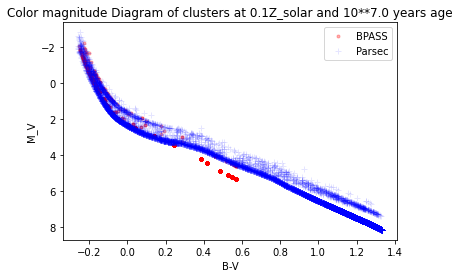

In [54]:
# Taking a look at the BPASS Cluster vs Parsec cluster Observer's HR Diagram
# Remember to use a distance modulus!
import matplotlib.pyplot as plt
plt.plot(clus_1.star_systems['m_ubv_B'] - clus_1.star_systems["m_ubv_V"],
         clus_1.star_systems["m_ubv_V"] - 5 * np.log10(100), "r.", label="BPASS", alpha =0.3)
plt.plot(clus_2.star_systems['m_ubv_B'] - clus_2.star_systems["m_ubv_V"],
         clus_2.star_systems["m_ubv_V"] - 5 * np.log10(100), "b+", label="Parsec", alpha=0.1)
plt.xlabel("B-V")
plt.ylabel("M_V")
plt.title("Color magnitude Diagram of clusters at 0.1Z_solar and 10**7.0 years age")
plt.gca().invert_yaxis()
plt.legend()

In [55]:
clus_1.star_systems[np.where(clus_1.star_systems["m_ubv_V"]==0)]

mass,systemMass,Teff,L,logg,isWR,mass_current,phase,metallicity,isMultiple,merged,m_ubv_U,m_ubv_V,m_ubv_B,m_ubv_R,m_ubv_I
solMass,solMass,K,W,,,solMass,,,,,,,,,
float64,float64,float64,float64,float64,bool,float64,float64,float64,bool,bool,float64,float64,float64,float64,float64


/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


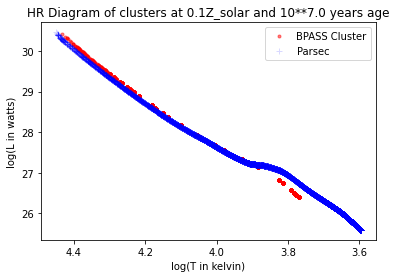

In [62]:
import matplotlib.pyplot as plt
plt.plot(np.log10(clus_1.companions['Teff']), np.log10(clus_1.companions["L"]),
         "r.",label="BPASS Cluster", alpha=0.5)
plt.plot(np.log10(clus_2.companions['Teff']), np.log10(clus_2.companions["L"]),
         "b+", alpha=0.15)
plt.plot(np.log10(clus_1.star_systems['Teff']), np.log10(clus_1.star_systems["L"]),
         "r.", alpha=0.5)
plt.plot(np.log10(clus_2.star_systems['Teff']), np.log10(clus_2.star_systems["L"]),
         "b+", label="Parsec", alpha=0.15)
plt.xlabel("log(T in kelvin)")
plt.ylabel("log(L in watts)")
plt.title("HR Diagram of clusters at 0.1Z_solar and 10**7.0 years age")
plt.gca().invert_xaxis()
plt.legend()

If I look at the HR Diagram, I do see deviation with respects to the Parsec line for some of the brighter stars, but I see a visually reasonable main-sequence turnoff.

Looking at which star system's primary/single stars are the white dwarves?

In [57]:
import numpy as np
np.where(clus_1.star_systems['phase']==101.0)[0]

array([   0,    1,    2, ..., 2745, 2746, 2747])

Black Holes?

In [58]:
np.where(clus_1.star_systems['phase']==103.0)[0]

array([], dtype=int64)

In [59]:
np.where(clus_1.star_systems['phase']==102.0)[0]

array([], dtype=int64)

Total mass of the cluster?

In [60]:
clus_1.star_systems['systemMass'].sum()

16282.240160514628